## Merge networks

In [294]:
# Libs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import os

In [295]:
files = [file for file in os.listdir('assets') if file.endswith('graphml')]
networks = [nx.read_graphml(f'assets/{file}') for file in files]

In [296]:
g = nx.compose_all(networks)

In [297]:
len(g.edges), len(g.nodes)

(106942, 15090)

In [298]:
indegree = sorted(dict(g.in_degree).values(),reverse=True)

## PDF and CDF plot

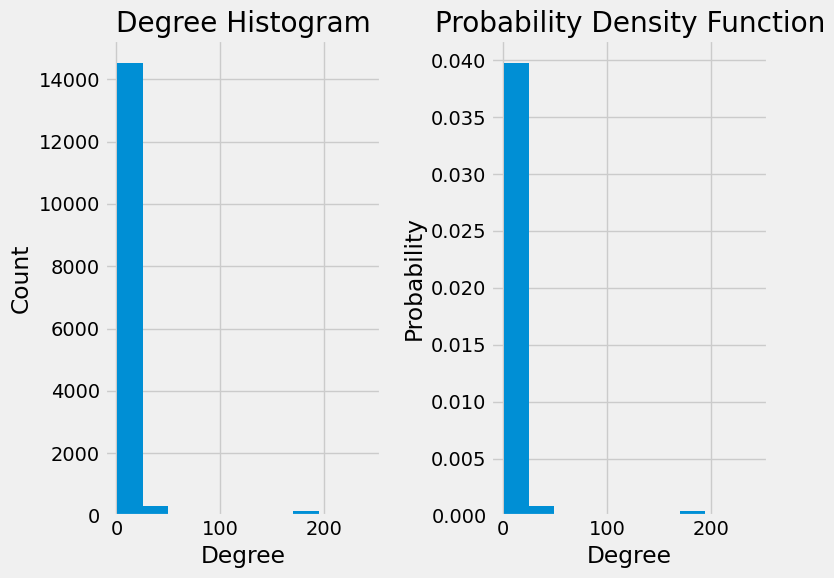

In [299]:
# # of bins
BINS = 10

# Color theme
plt.style.use("fivethirtyeight")
# plt.style.use("default")

degree_sequence = sorted(indegree, reverse=True)
fig, ax = plt.subplots(1,2,figsize=(8,6))

all_data = ax[0].hist(degree_sequence, bins=BINS)
ax[1].hist(degree_sequence, bins=BINS, density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [300]:
# All_data has information about degree_sequence and the width of each bin
print(all_data)

(array([1.452e+04, 3.120e+02, 1.800e+01, 6.000e+00, 2.000e+00, 0.000e+00,
       6.400e+01, 1.630e+02, 4.000e+00, 1.000e+00]), array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
       218.8, 243. ]), <BarContainer object of 10 artists>)


In [301]:
# Print the width of each bin
print(all_data[1])

[  1.   25.2  49.4  73.6  97.8 122.  146.2 170.4 194.6 218.8 243. ]


In [302]:
# Calc the width of each bin using numpy
# np.diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])
bin_width

array([24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2])

In [303]:
# Total number of elements in array
all_data[0].sum()

15090.0

In [304]:
# Probability density function for each bin
# Please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)

array([3.97614314e-02, 8.54377865e-04, 4.92910307e-05, 1.64303436e-05,
       5.47678119e-06, 0.00000000e+00, 1.75256998e-04, 4.46357667e-04,
       1.09535624e-05, 2.73839059e-06])

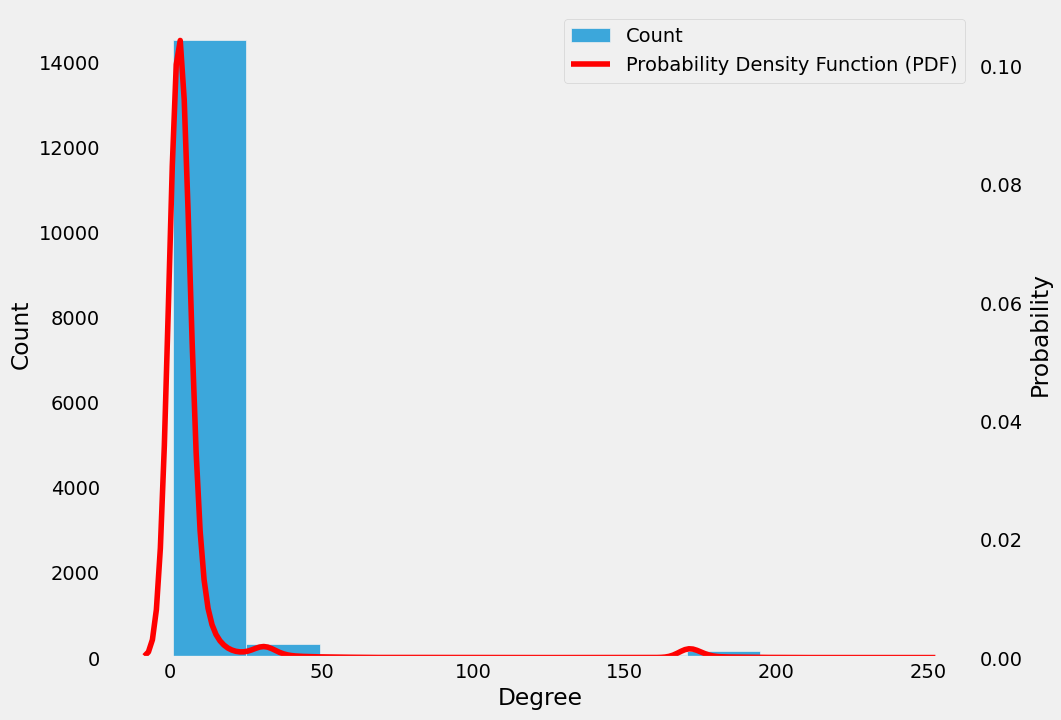

In [305]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=BINS,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# Ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

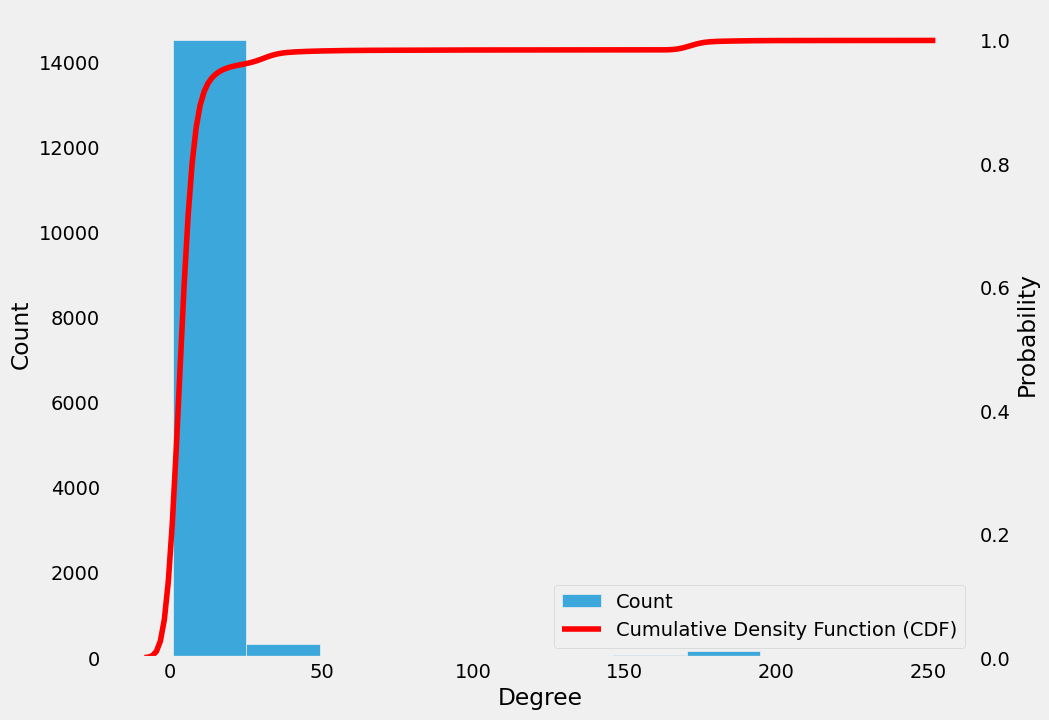

In [306]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=BINS,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# Ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## K-code and K-shell

### Find K-core

In [307]:
cores = set([v for k,v in nx.core_number(g).items()])

cores, len(cores)

({2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  40,
  43,
  45,
  46,
  47,
  48,
  50,
  53,
  63,
  80,
  96,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  311},
 56)

In [308]:
# K-core nodes
core = 177
k_core_nodes = nx.k_core(g,core)

k_core_nodes.nodes

NodeView(('Drilling Engineering', 'National Oil Company', 'Tapis Crude', 'Kuwait Petroleum Corporation', 'Petrovietnam', 'Gas Exporting Countries Forum', 'Directional Drilling', 'Seismic Inversion', 'Swing Producer', 'Geosteering', 'Benchmark (Crude Oil)', 'Tnk-Bp', 'Suncor Energy', 'Seven Sisters (Oil Companies)', 'Compañía Española De Petróleos', 'Cameron International', 'Isthmus-34 Light', 'Seismic Source', 'Shale Oil Extraction', 'Bonny Light Oil', 'Ancap (Uruguay)', 'Tight Oil', 'Gulf Of Mexico', 'Western Canadian Select', 'Posted Price', 'International Association Of Oil & Gas Producers', 'American Petroleum Institute', 'Persian Gulf', 'North Sea Oil', 'Indian Basket', 'Petrobras', 'Oil Sand', 'Cenovus Energy', 'Hess Corporation', 'Natural Gas Prices', 'Big Oil', 'Gasoline And Diesel Usage And Pricing', 'Port Harcourt Refining Company', 'Petroleum Engineering', 'Heavy Crude Oil', 'Petroleum Product', 'Petroleum', 'History Of The Petroleum Industry In France', 'Squeeze Job', 'Chev

### Finding K-shell

In [309]:
shell = 176
k_shell_nodes = nx.k_shell(g,shell)

k_shell_nodes.nodes

NodeView(('Oil Exploration', 'Abandoned Wells', 'Bharat Petroleum', 'Gas Field', 'Tc Energy', 'Tullow Oil', 'Gazprom', 'Energy Trading', 'Ecopetrol', 'Indian Oil Corporation', 'Exploration Well', 'Hindustan Petroleum', 'Reliance Industries', 'Oil Reservoir', 'Caspian Sea', 'Kola Superdeep Borehole', 'Enhanced Oil Recovery', 'Oil Field', 'Drilling Mud', 'Downstream (Petroleum Industry)', 'Marathon Petroleum', 'Reservoir Rock', 'Pemex', 'Lukoil', 'Saudi Aramco World', 'Oil Refinery', 'Petroleum Industry In Iraq', 'Canadian Petroleum Companies', 'Gas Initially In Place', 'Permian Basin (North America)', 'Bp', 'Devon Energy', 'Valero Energy', 'Petroleum Reservoir', 'Mwd (Measurement While Drilling)'))

### Labelling nodes on K-shell and K-core

In [310]:
# Evaluete layer attribute for each node
attrs = {}
for node in g.nodes:
    attr = {}
    if node in k_shell_nodes:
        attr['layer'] = 1
    if node in k_core_nodes:
        attr['layer'] = 2
    attrs[node] = attr

# Add attribute
nx.set_node_attributes(g, attrs)

# Export graphml
nx.write_graphml(g, "cna.graphml")